## **Seattle Airbnb Data Analysis Project**






We have been given the Airbnb dataset of seattle, we have the data of host, and the guests. We can use this data to increase the number of guests by improving the details that the users want. 

We have been given three datasets:
*   Listings, including full descriptions and average review score.
*   Reviews, including unique id for each reviewer and detailed comments.
*   Calendar, including listing id and the price and availability      for that day.





Questions I will try to answer in this notebook:
1.   What are the features that influence positively on the number of accommodates?
2.   What features are the guests looking for, so that it can be improved in other houses as well.
3.   What type of houses that people prefer(Entire home/private room/shared room)



We will try and follow the CRISP-DM process while ecexuting the code.
CRISP-DM is short for Cross Industry Process for Data Mining.
It provides a structured approach and process for a project.
CRISP-DM process includes:
   1. Business Understanding.
   2. Data Understanding.
   3. Prepare Data.
   4. Model Data.
   5. Results.
   6. Deploy

In [53]:
#First, we will import all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
#Since we have over 90 columns in the dataset, we have to set the display to be over 90:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Now, we will read all the datasets we have

In [55]:
df_listings = pd.read_csv('/content/drive/MyDrive/list.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/rev.csv')
df_cal = pd.read_csv('/content/drive/My Drive/cal.csv')

In [56]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [57]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [58]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [59]:
print("listings number of rows and columns: ", df_listings.shape[0], df_listings.shape[1])
print("reviews number of rows and columns: ", df_reviews.shape[0], df_reviews.shape[1])
print("calendar number of rows and columns: ", df_cal.shape[0], df_cal.shape[1])

listings number of rows and columns:  3818 92
reviews number of rows and columns:  84849 6
calendar number of rows and columns:  1393570 4


We will majorly use the listings dataset, let's understand the dataset first.

In [60]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [61]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Now, let's create a subset, to consider only those columns that we require.

In [62]:
df_index = df_listings[['id','instant_bookable','host_response_rate', 'host_acceptance_rate','host_id','zipcode','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','number_of_reviews','price','property_type']]

In [63]:
df_index.head()

,id,instant_bookable,host_response_rate,host_acceptance_rate,host_id,zipcode,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,number_of_reviews,price,property_type
0,241032,f,96%,100%,956883,98119,Entire home/apt,4,1.0,1.0,1.0,4.07,207,$85.00,Apartment
1,953595,f,98%,100%,5177328,98119,Entire home/apt,4,1.0,1.0,1.0,1.48,43,$150.00,Apartment
2,3308979,f,67%,100%,16708587,98119,Entire home/apt,11,4.5,5.0,7.0,1.15,20,$975.00,House
3,7421966,f,NaN,NaN,9851441,98119,Entire home/apt,3,1.0,0.0,2.0,NaN,0,$100.00,Apartment
4,278830,f,100%,NaN,1452570,98119,Entire home/apt,6,2.0,3.0,3.0,0.89,38,$450.00,House


From the above, we can see that our dataset is not clean. There are null values and the prices have symbols like '$' in them, that we have to get rid of. So let's do that.

In [64]:
df_index.isna().sum()

id                        0
instant_bookable          0
host_response_rate      523
host_acceptance_rate    773
host_id                   0
zipcode                   7
room_type                 0
accommodates              0
bathrooms                16
bedrooms                  6
beds                      1
reviews_per_month       627
number_of_reviews         0
price                     0
property_type             1
dtype: int64

In [65]:
#Fill the NaN values with zero
df_index.fillna(0, inplace=True)
df_index.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,id,instant_bookable,host_response_rate,host_acceptance_rate,host_id,zipcode,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,number_of_reviews,price,property_type
0,241032,f,96%,100%,956883,98119,Entire home/apt,4,1.0,1.0,1.0,4.07,207,$85.00,Apartment
1,953595,f,98%,100%,5177328,98119,Entire home/apt,4,1.0,1.0,1.0,1.48,43,$150.00,Apartment
2,3308979,f,67%,100%,16708587,98119,Entire home/apt,11,4.5,5.0,7.0,1.15,20,$975.00,House
3,7421966,f,0,0,9851441,98119,Entire home/apt,3,1.0,0.0,2.0,0.00,0,$100.00,Apartment
4,278830,f,100%,0,1452570,98119,Entire home/apt,6,2.0,3.0,3.0,0.89,38,$450.00,House


In [66]:
#The price column has str value of $ and commas, we have to remove them.
df_index['price'] = df_index['price'].str.replace("$","")
df_index['price'] = df_index['price'].str.replace(",","")
df_index['price'] = df_index['price'].str.replace("'","")
df_index['price'] = df_index['price'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [67]:
df_index['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

Now that we have a cleaner subset, let's get the correlation between all the column elements. A figure of how strongly they are related to each other.


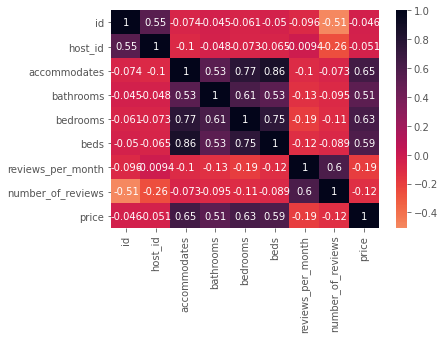

In [68]:
#Let's get the correlation between the values of the dataset:
corr = df_index.corr()
cmap = sns.cm.rocket_r
ax = sns.heatmap(corr, annot=True, center=0, cmap=cmap, linecolor='blue')

Conclusions we can draw from the heatmap:
*   Number of beds have a strong correlation to the number of accomodates.
*   Number of bedrooms have a strong correlation to the number of accomodates.

Let's find out what number of beds and bedrooms are preferred by majority of the people.



In [69]:
#Let's see what number of bedrooms are preferred by majority
df_bedroom = df_index.groupby('bedrooms').id.count()
df_bedroom = df_bedroom.reset_index()
df_bedroom = df_bedroom.rename(columns={'id':'listings'})
df_bedroom = df_bedroom.sort_values('listings', ascending=False)
df_bedroom

,bedrooms,listings
1,1.0,2417
2,2.0,640
0,0.0,378
3,3.0,283
4,4.0,69
5,5.0,24
6,6.0,6
7,7.0,1


In [70]:
import statistics

prices = df_index[df_index['bedrooms'] == 1]
prices.head()
prices['price'].mean()



95.70624741414977

We can conclude from the above that, most of the occupants prefer houses with 1 bedroom. But that does not give much information about the number of beds, as there can be more than one bed in a single bedroom.
Let's do the same for number of beds.

In [71]:
df_beds = df_index.groupby('beds').id.count()
df_beds = df_beds.reset_index()
df_beds = df_beds.rename(columns={'id':'listings'})
df_beds = df_beds.sort_values('listings', ascending=False)
df_beds.head()

,beds,listings
1,1.0,2201
2,2.0,912
3,3.0,433
4,4.0,152
5,5.0,73


In [72]:
prices = df_index[df_index['beds'] == 1]
prices.head()
prices['price'].mean()

93.14947751022262

Maximum number of occupants prefer a single bed house, for which they have to pay around 93.2$.

Now, let's see if higher number of reviews leads to more numbe rof listings in the house. We cannot directly match that with accommodates, as there can be more than one occupant during a sing listing. So let's look at the number os listings.

In [73]:
df_nor = df_index.groupby('number_of_reviews').id.count()
df_nor = df_nor.reset_index()
df_nor = df_nor.rename(columns={'id':'listings'})
df_nor = df_nor.sort_values('listings', ascending=False)
df_nor.head()

,number_of_reviews,listings
0,0,627
1,1,310
2,2,224
4,4,160
3,3,157


We can conclude that the number of reviews is not a big influence on the listings, but other factors like number of beds and bedrooms have a higher influence.

Now, let's find the area where we get the maximum number of listings.

In [74]:
df_loc = df_index.groupby('zipcode').id.count()
df_loc = df_loc.reset_index()
df_loc = df_loc.rename(columns={'id':'listings'})
df_loc = df_loc.sort_values('listings', ascending=False)
df_loc.head()

,zipcode,listings
17,98122,420
3,98103,394
2,98102,339
5,98105,225
9,98109,202


Text(0.5, 0, 'zipcode')

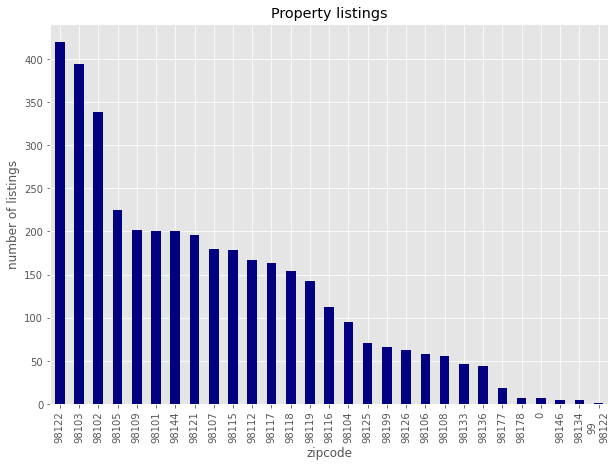

In [75]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

zcode = df_loc['zipcode']

lis = df_loc['listings']

df_loc.plot(kind='bar', x='zipcode', y='listings', color='#000080', figsize=(10,7), title='Property listings', legend=False)
plt.ylabel('number of listings')
plt.xlabel('zipcode')

Area with zipcode = '98122' has the highest number of listings.

Now that we have the information about what accommodates are looking for, let's check out the features that influence the rent of the houses.

In [76]:
df = df_listings[['host_response_rate', 'host_acceptance_rate','zipcode','room_type','accommodates','bathrooms','bedrooms','beds','price']]

In [77]:
df['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [78]:
df['price'] = df['price'].str.replace("$","")
df['price'] = df['price'].str.replace(",","")
df['price'] = df['price'].str.replace("'","")
df['price'] = df['price'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [79]:
df['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

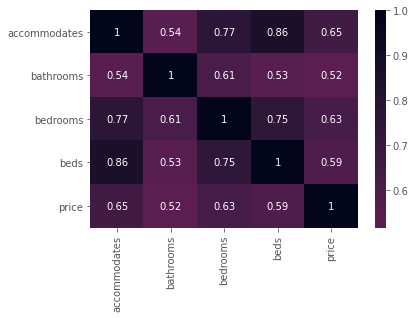

In [80]:
corr = df.corr()
cmap = sns.cm.rocket_r
ax = sns.heatmap(corr, annot=True, center=0, cmap=cmap, linecolor='blue')

We, can see that number of bedrooms and the number of accommodates have higher correlation (comparatively) to the price of the house.

We are given the location of the house (latitude and longitude). Let's see how the houses are scattered in the region.

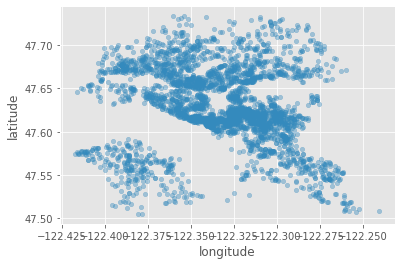

In [81]:
df_listings.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

Now, let's try and answer the third question mentioned at the beginning.
We have to see what kind of houses people prefer(Entire home/private room/shared room).
We will use the subset created earlier (df_index) for this.

In [82]:
#We know that room_type is categorical, hence we can list the number of listings based on the type of room

df_roomtype = df_index.groupby('room_type').id.count()
df_roomtype = df_roomtype.reset_index()
df_roomtype = df_roomtype.rename(columns={'id':'listings'})
df_roomtype

,room_type,listings
0,Entire home/apt,2541
1,Private room,1160
2,Shared room,117


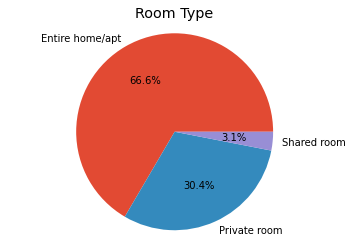

In [83]:
import matplotlib.pyplot as plt

lis = df_roomtype['listings']

my_labels = df_roomtype['room_type']
plt.pie(lis,labels=my_labels,autopct='%1.1f%%')
plt.title('Room Type')
plt.axis('equal')
plt.show()

Maximum number of occupants prefer the entire house and a shared room is preferred by a very small number if people.

Observations

1.   Entire house:  66.6%
2.   Private room: 30.4%
3.   Shared room: 3.1%






In [84]:
#Now, doing the same for the type of property
df_proptype = df_index.groupby('property_type').id.count()
df_proptype = df_proptype.reset_index()
df_proptype = df_proptype.rename(columns={'id':'listings'})
df_proptype

,property_type,listings
0,0,1
1,Apartment,1708
2,Bed & Breakfast,37
3,Boat,8
4,Bungalow,13
5,Cabin,21
6,Camper/RV,13
7,Chalet,2
8,Condominium,91
9,Dorm,2


Text(0.5, 0, 'property type')

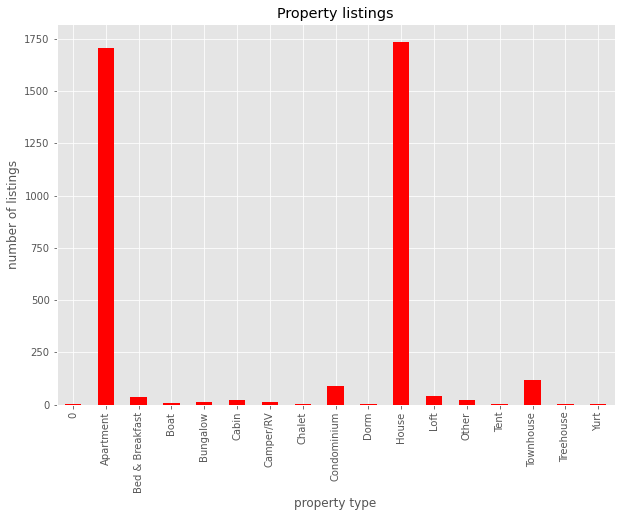

In [85]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

name = df_proptype['property_type']

lis = df_proptype['listings']

df_proptype.plot(kind='bar', x='property_type', y='listings', color='#ff0000', figsize=(10,7), title='Property listings', legend=False)
plt.ylabel('number of listings')
plt.xlabel('property type')

We can see that almost all of the guests prefer a hiuse/appartment.

# Observations

We have the following answers to the questions mentioned earlier:



1.   What are the features that influence positively on the number of accommodates?

We saw from the correlation table that, 

-Number of beds have a strong correlation to the number of accomodates.

-Number of bedrooms have a strong correlation to the number of accomodates.



2. What features are the guests looking for, so that it can be improved in other houses as well.

We saw that most of the accomodates prefer houses with 1 bedroom, and 1 bed. This was true in maximum number of cases, does not mean that we should concentrate on them only!

We alse notices that the number of reviews do not matter much.

Location is a bif influence!

Below is a table of our observations:

In [89]:
data = [['1 bedrooms', 2417], ['1 bed', 2201], ['Zipcode: 98122 ',420 ]]
df = pd.DataFrame(data, columns = ['Feature', 'Number of listings'])
df
  

,Feature,Number of listings
0,1 bedrooms,2417
1,1 bed,2201
2,Zipcode: 98122,420


3. What type of houses that people prefer(Entire home/private room/shared room)

We can conclude from the pie chart:
1.   Entire house:  66.6%
2.   Private room: 30.4%
3.   Shared room: 3.1%



**Thank You!!**